# FOD

In [1]:
!python -V

Python 3.6.9


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Read Img

In [3]:
img = cv2.imread('sample.jpg')
print(img.shape, img.dtype)

(4000, 2560, 3) uint8


In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape, gray.dtype)

(4000, 2560) uint8


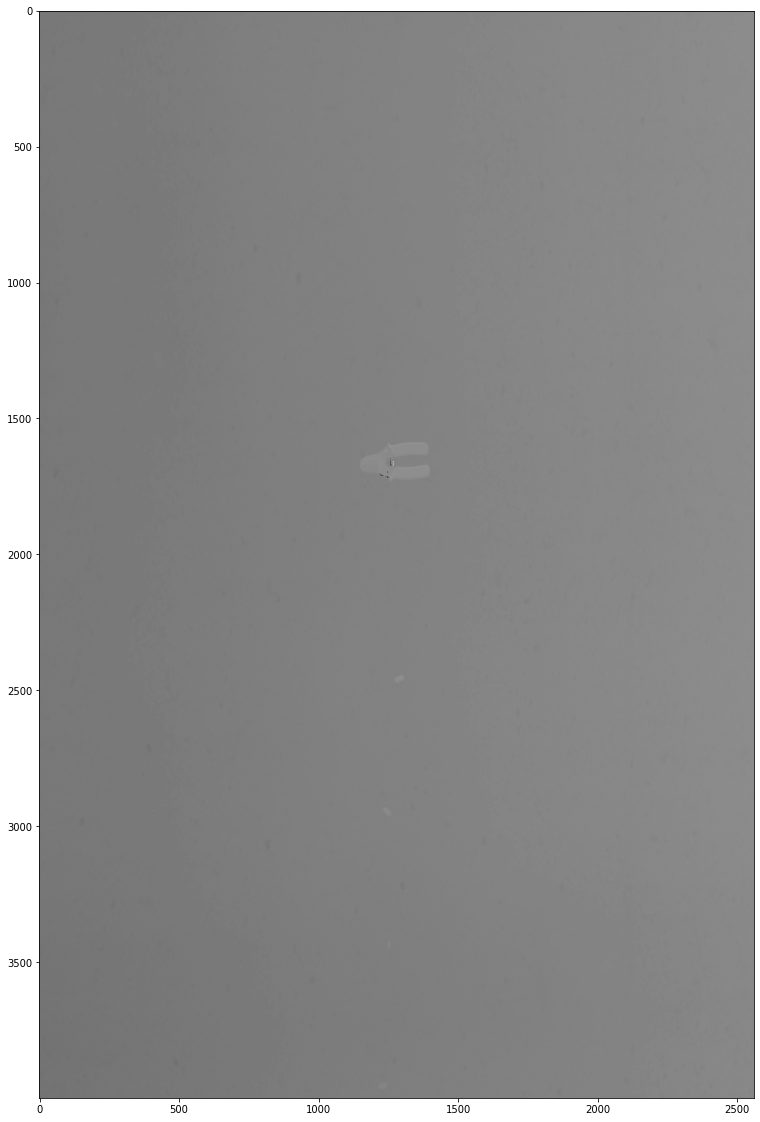

In [5]:
y, x = gray.shape
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(gray, cmap='gray', aspect='auto')

## Try different filters

Conslusion: the Gaussian Filter is chosen in end end.

### Gaussian Filter

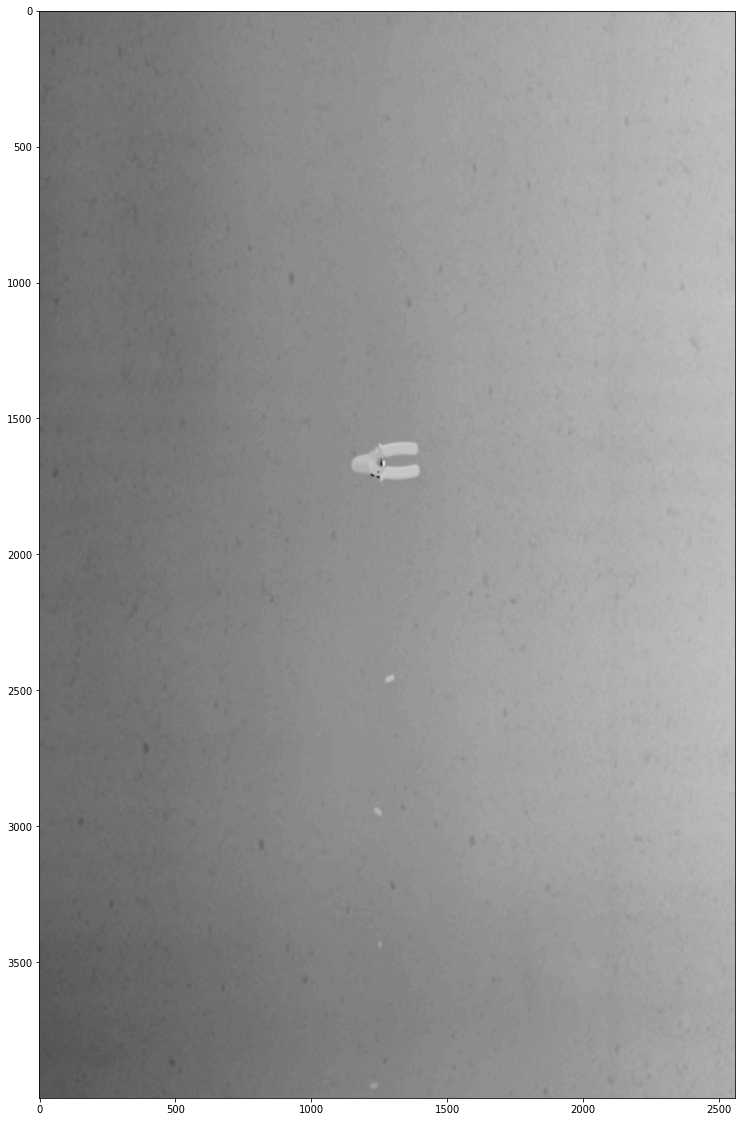

In [75]:
gaussian_blurred = cv2.GaussianBlur(gray, (15,15), 0) 
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(gaussian_blurred, cmap='gray')
# cv2.imwrite( "./blurred.jpg", blurred);


### Bilateral Filter

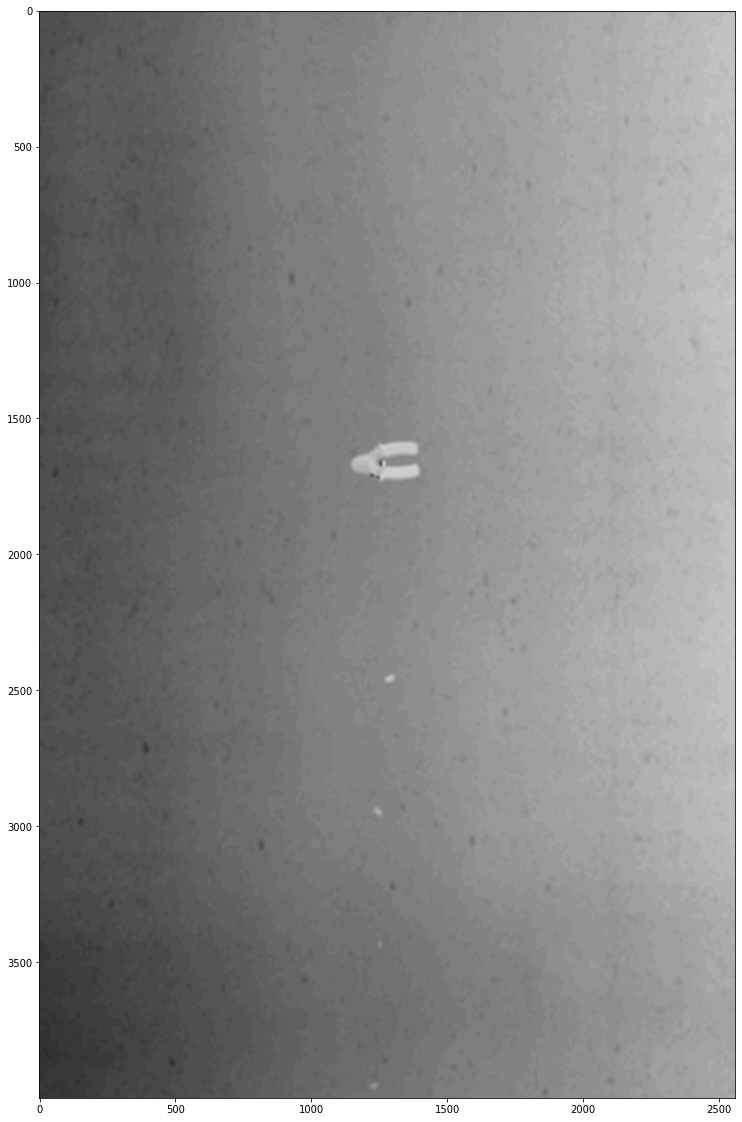

In [36]:
bilateral_blurred = cv2.bilateralFilter(gray, 19, 120, 120) 
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(bilateral_blurred, cmap='gray')

## Dilate

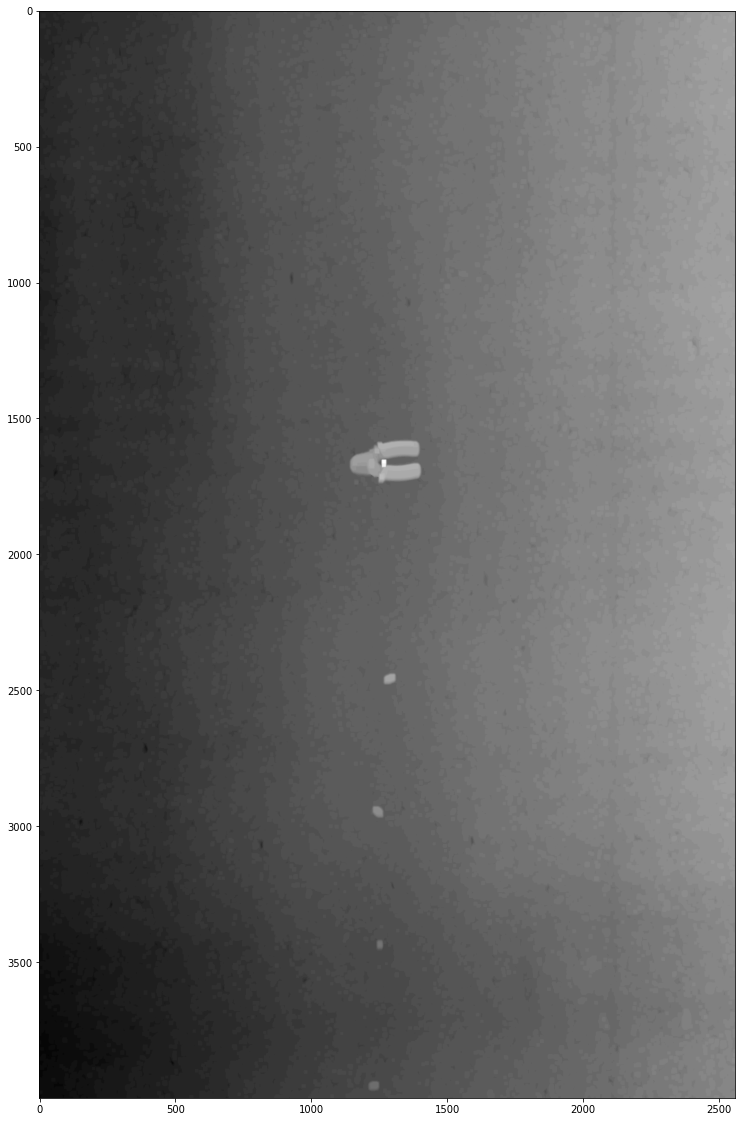

In [86]:
# Use gaussian blur here.
blurred = gaussian_blurred
dilated = cv2.dilate(blurred, None, iterations=5)

plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(test, cmap='gray')

## Gradient

The Y gradient is chosen in the end. 

In [87]:
gradX = cv2.Sobel(dilated, ddepth=cv2.CV_32F, dx=1, dy=0)
gradY = cv2.Sobel(dilated, ddepth=cv2.CV_32F, dx=0, dy=1)
gradient_minus = cv2.subtract(gradY, gradX)
gradient_add = cv2.add(gradY, gradX)
# gradY = cv2.convertScaleAbs(gradY)

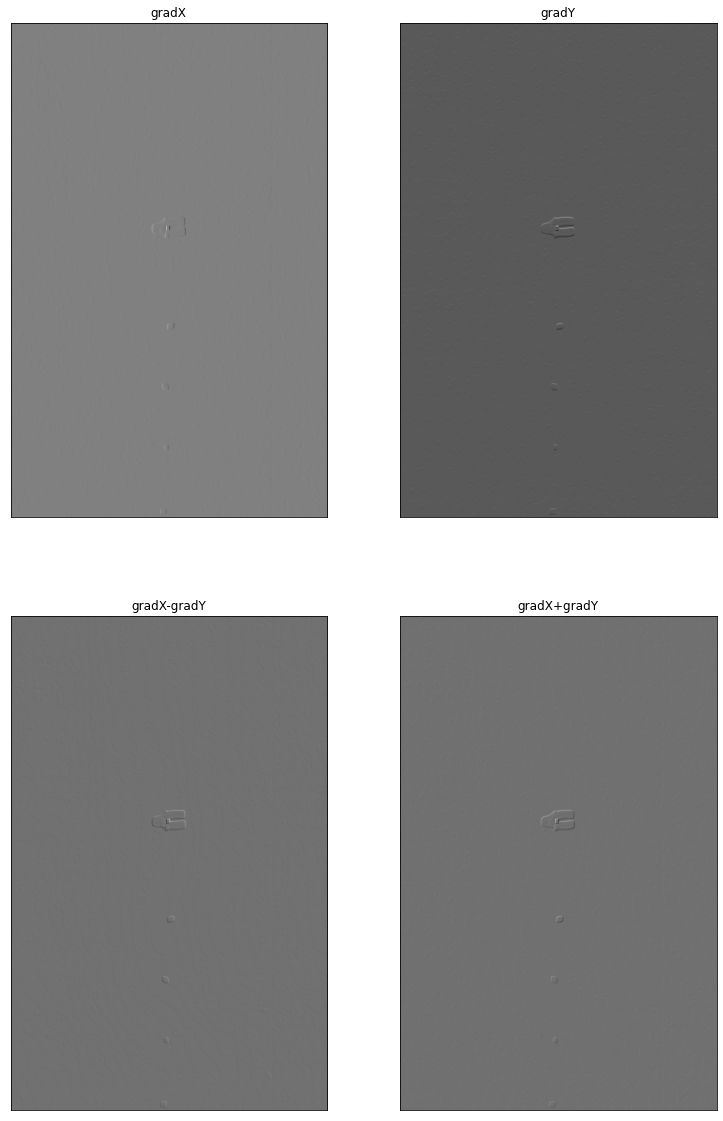

In [88]:
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.subplot(2,2,1),plt.imshow(gradX,'gray')
plt.title('gradX'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(gradY,'gray')
plt.title('gradY'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(gradient_minus,'gray')
plt.title('gradX-gradY'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(gradient_add,'gray')
plt.title('gradX+gradY'), plt.xticks([]), plt.yticks([])
plt.show()

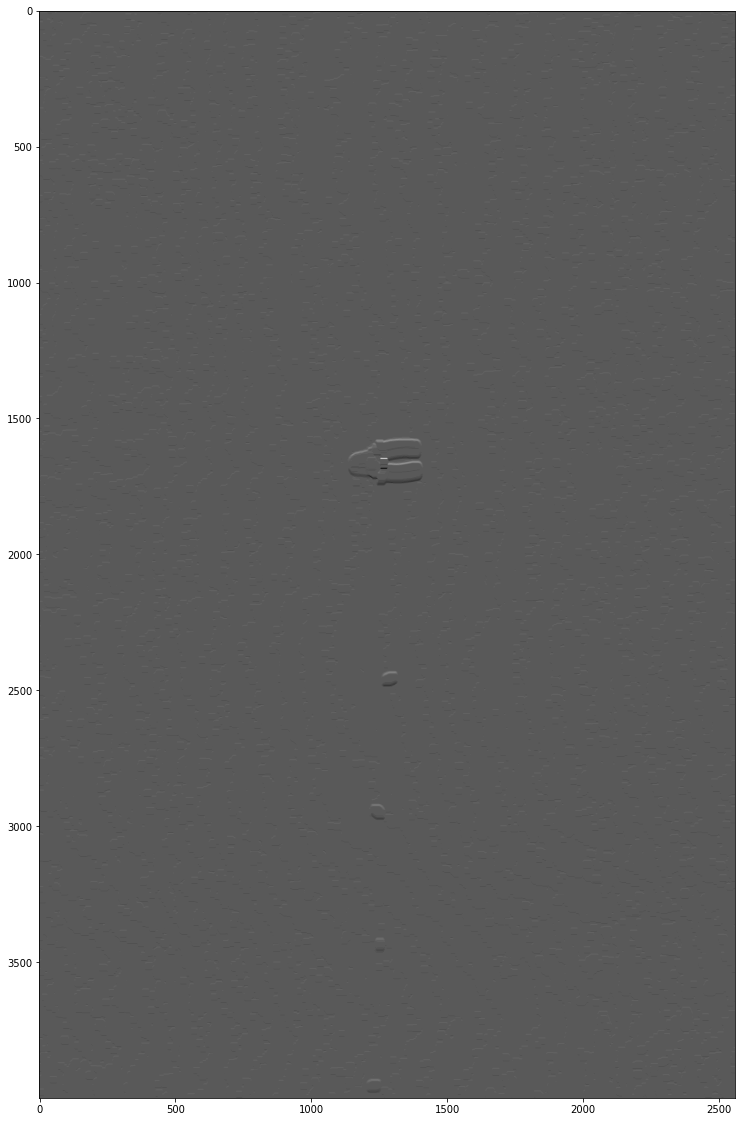

In [89]:
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(gradY, cmap='gray')

## Try Different Threshold Method

Conslusion: the Gaussian Adaptive threshold is chosen.

### Gaussian Adaptive threshold

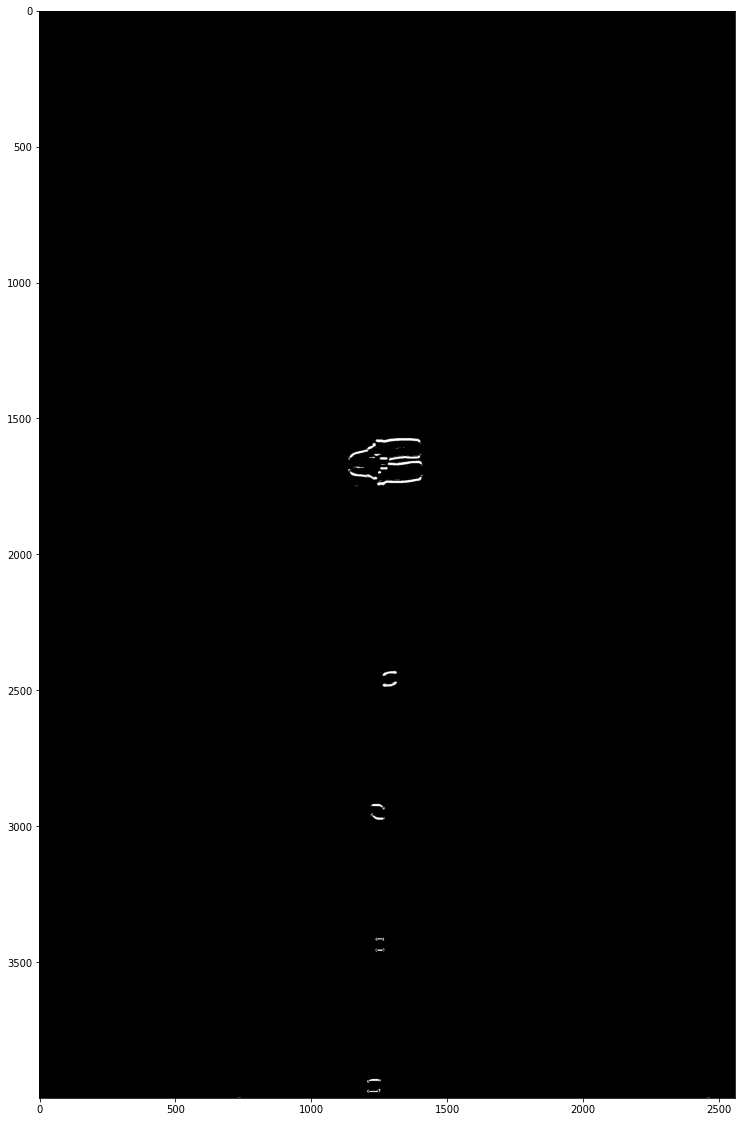

In [98]:
# gradient = gradient_add
gradient = gradY
blurred2 = cv2.GaussianBlur(gradient, (19, 19), 0)
# convert gradient float to int.
blurred2_int = (np.uint8(np.absolute(blurred2) * 
                (255 / np.amax(np.absolute(blurred2))/ 29)))
adaptive_threshold = cv2.adaptiveThreshold(
    blurred2_int,  255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 39, 0)
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(adaptive_threshold, cmap='gray')

### Binary threshold

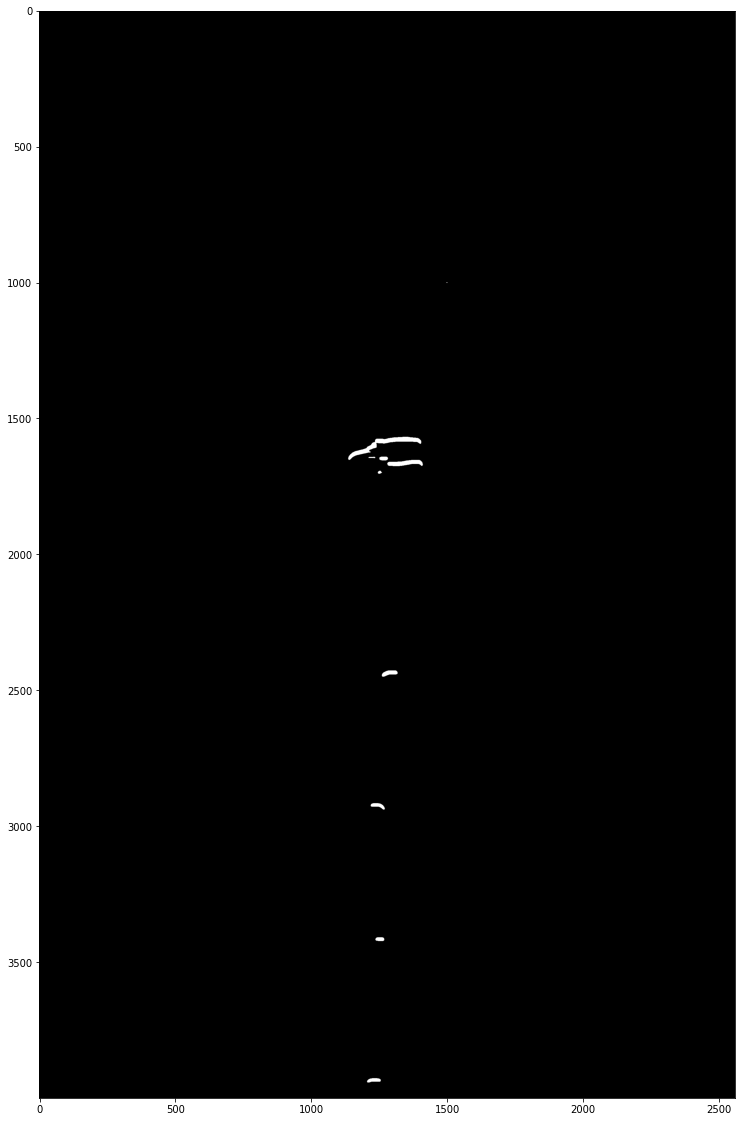

In [92]:
# gradient = gradient_add
gradient = gradY
blurred2 = cv2.GaussianBlur(gradient, (19, 19), 0)
_, binary_threshold = cv2.threshold(blurred2, 1.5, 255, cv2.THRESH_BINARY)
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(binary_threshold, cmap='gray')

## Edging and Dilating

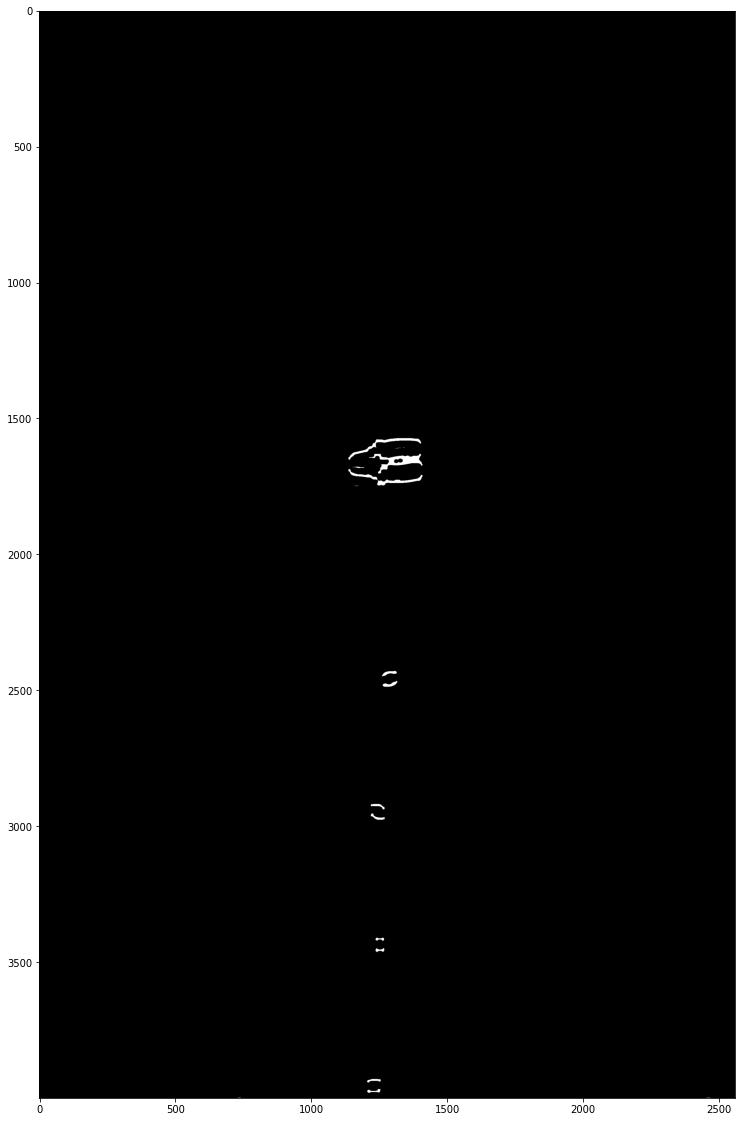

In [99]:
# threshold = binary_threshold
threshold = adaptive_threshold
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
# closed = cv2.erode(closed, None, iterations=4)
# closed = cv2.dilate(closed, None, iterations=4)
plt_ratio = 200
plt.figure(figsize = (x/plt_ratio,y/plt_ratio))
plt.imshow(closed, cmap='gray')

## Save the output

In [344]:
cv2.imwrite( "./output.jpg", closed);

In [62]:
closed.shape

(4000, 2560)